# Project Minat Match AI
Membangun model untuk memprediksi jalur karier bagi mahasiswa Teknik Informatika menggunakan beberapa faktor yang terkait, antara lain skills assessment, educational background data, dan sebagainya.

# Sumber Dataset: https://www.kaggle.com/datasets/devildyno/computer-science-students-career-prediction

## Import Library

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - Model Selection and Validation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold

# Machine Learning - Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Machine Learning - Algorithms
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Machine Learning - Evaluation Metrics
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)

# Utilities
import joblib
import warnings
import kagglehub
import json
import os
from datetime import datetime
import time

## Data Loading

In [2]:
# Download dataset from Kaggle
print("Initializing dataset download from Kaggle Hub...")
path = kagglehub.dataset_download("devildyno/computer-science-students-career-prediction")
print(f" Dataset successfully downloaded to: {path}")

Initializing dataset download from Kaggle Hub...
 Dataset successfully downloaded to: /kaggle/input/computer-science-students-career-prediction


In [3]:
# Load the CSV file
file_path = path + "/cs_students.csv"
df = pd.read_csv(file_path)

## Exploratory Data Analysis (EDA)

In [4]:
# Dataset Overview and Staticstical Summary
print(f" Dataset Dimensions: {df.shape[0]} students × {df.shape[1]} features")

 Dataset Dimensions: 180 students × 12 features


In [5]:
# Structure Data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Student ID         180 non-null    int64  
 1   Name               180 non-null    object 
 2   Gender             180 non-null    object 
 3   Age                180 non-null    int64  
 4   GPA                180 non-null    float64
 5   Major              180 non-null    object 
 6   Interested Domain  180 non-null    object 
 7   Projects           180 non-null    object 
 8   Future Career      180 non-null    object 
 9   Python             180 non-null    object 
 10  SQL                180 non-null    object 
 11  Java               180 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 17.0+ KB
None


In [6]:
# Show 5 rows from Data
display(df.head())

,Student ID,Name,Gender,Age,GPA,Major,Interested Domain,Projects,Future Career,Python,SQL,Java
0,1,John Smith,Male,21,3.5,Computer Science,Artificial Intelligence,Chatbot Development,Machine Learning Researcher,Strong,Strong,Weak
1,2,Alice Johnson,Female,20,3.2,Computer Science,Data Science,Data Analytics,Data Scientist,Average,Strong,Weak
2,3,Robert Davis,Male,22,3.8,Computer Science,Software Development,E-commerce Website,Software Engineer,Strong,Strong,Average
3,4,Emily Wilson,Female,21,3.7,Computer Science,Web Development,Full-Stack Web App,Web Developer,Weak,Strong,Strong
4,5,Michael Brown,Male,23,3.4,Computer Science,Cybersecurity,Network Security,Information Security Analyst,Average,Weak,Strong


In [7]:
# Statisctic Descriptive
df.describe()

,Student ID,Age,GPA
count,180.000000,180.000000,180.000000
mean,90.500000,22.116667,3.615000
std,52.105662,2.823040,0.177341
min,1.000000,20.000000,3.200000
25%,45.750000,21.000000,3.500000
50%,90.500000,22.000000,3.600000
75%,135.250000,22.250000,3.700000
max,180.000000,37.000000,3.900000


In [8]:
# Check Target Class
career_counts = (df['Future Career'].value_counts())
print(career_counts)
print(df['Future Career'].unique())

Future Career
Web Developer                   19
Mobile App Developer            17
Information Security Analyst    17
Cloud Solutions Architect       16
Database Administrator          16
Software Engineer               14
Machine Learning Engineer       13
NLP Research Scientist          11
Graphics Programmer              9
Data Scientist                   8
Data Analyst                     6
AI Researcher                    6
Game Developer                   4
UX Designer                      2
Quantum Computing Researcher     2
Bioinformatician                 2
Healthcare IT Specialist         2
Machine Learning Researcher      1
Robotics Engineer                1
Embedded Software Engineer       1
Security Analyst                 1
Ethical Hacker                   1
IoT Developer                    1
Computer Vision Engineer         1
DevOps Engineer                  1
NLP Engineer                     1
VR Developer                     1
SEO Specialist                   1
Blockc

In [9]:
# Check Missing Values
df.isnull().sum()

,0
Student ID,0
Name,0
Gender,0
Age,0
GPA,0
Major,0
Interested Domain,0
Projects,0
Future Career,0
Python,0


<ipython-input-10-324cac713d15>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=career_counts_top.values, y=career_counts_top.index, palette='magma')


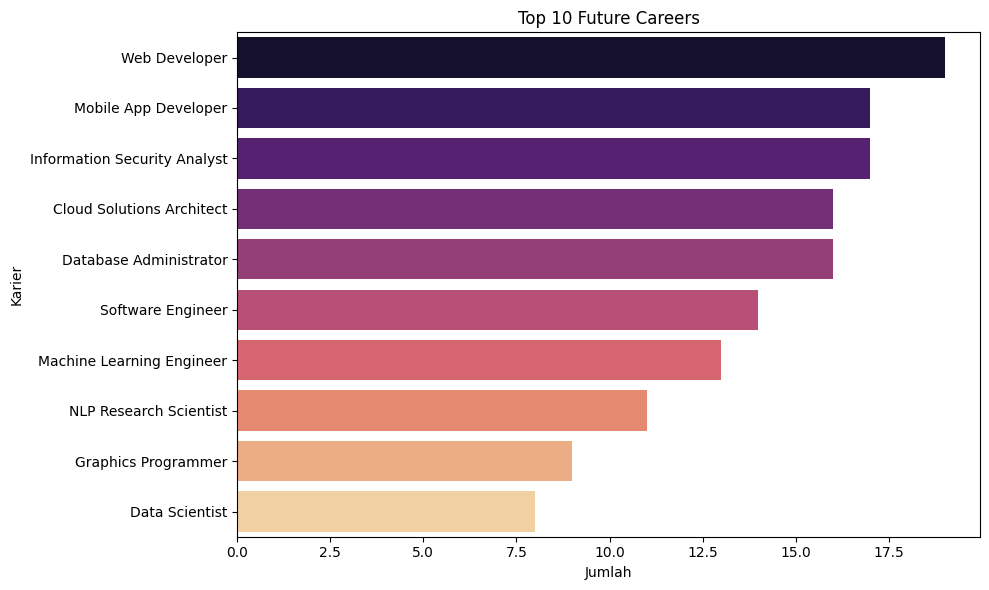

In [10]:
# Distribusi Target Class Top 10
top_n = 10
career_counts_top = career_counts.head(top_n)
plt.figure(figsize=(10, 6))
sns.barplot(x=career_counts_top.values, y=career_counts_top.index, palette='magma')
plt.title(f'Top {top_n} Future Careers')
plt.xlabel('Jumlah')
plt.ylabel('Karier')
plt.tight_layout()
plt.show()


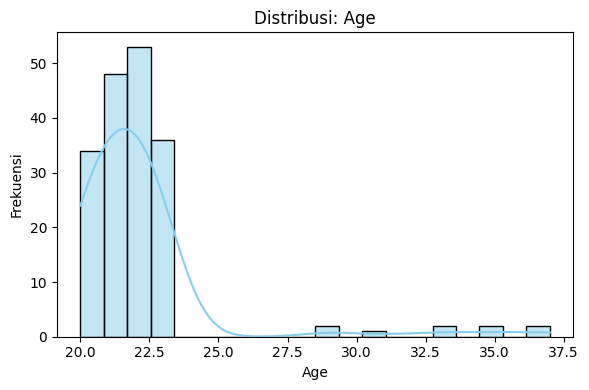

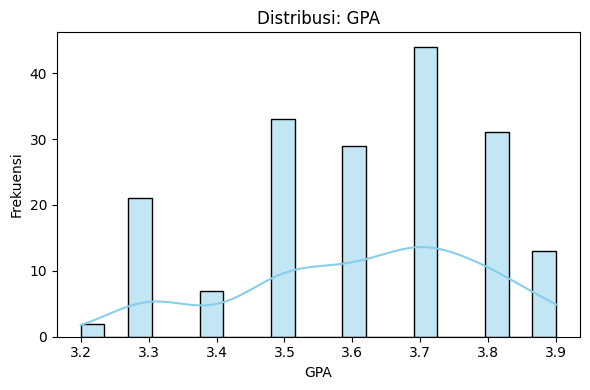

In [11]:
# Distribusi Kolom Numerik
# Daftar fitur numerik
numerical_features = ['Age', 'GPA']

# Visualisasi distribusi tiap fitur numerik
for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribusi: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()


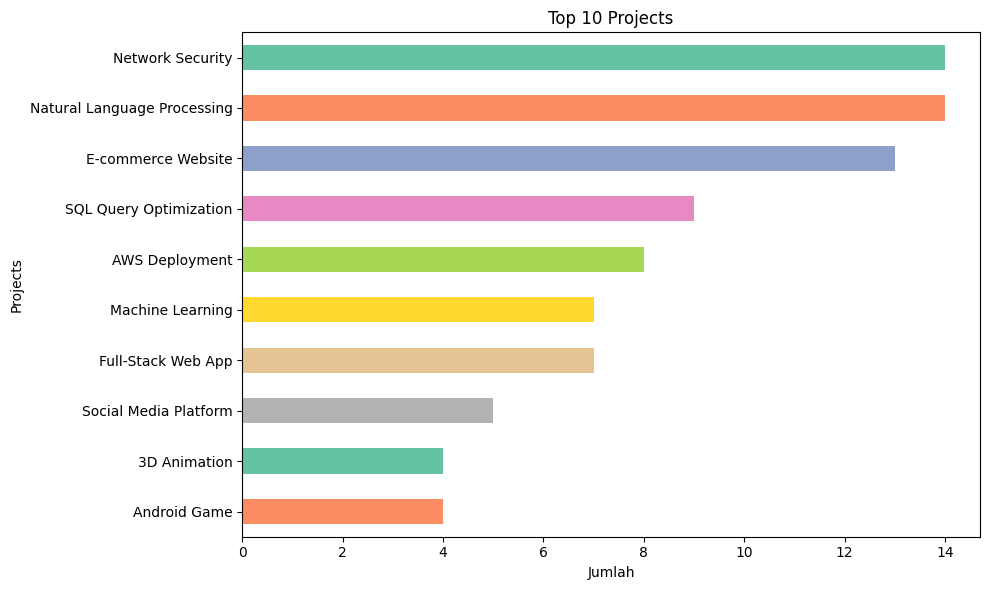

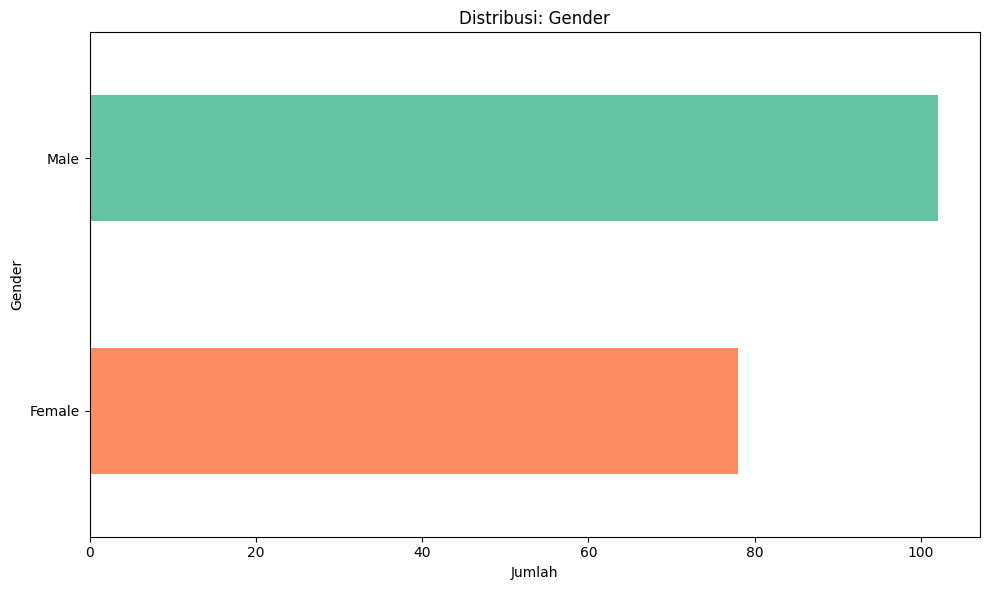

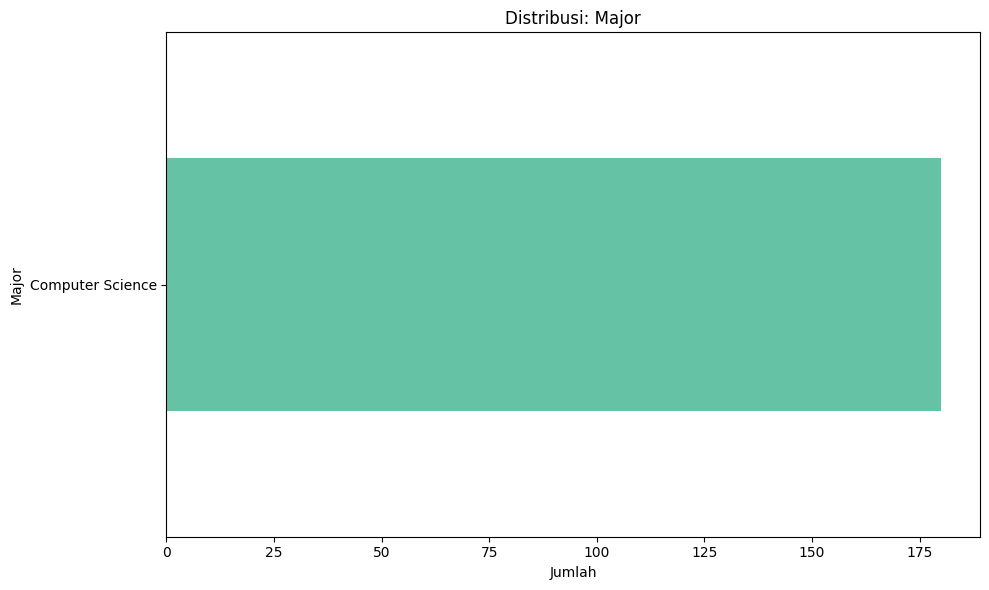

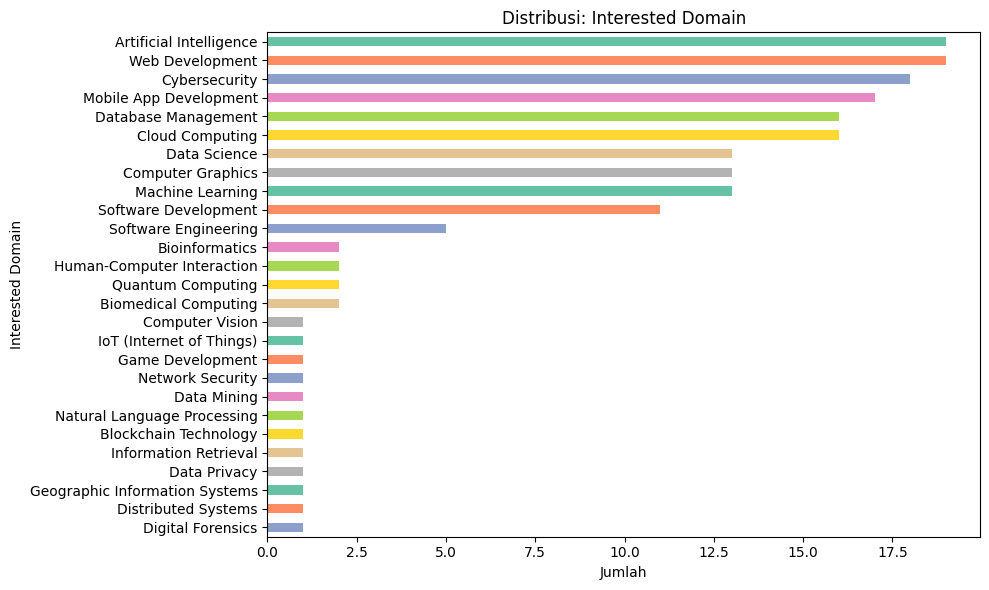

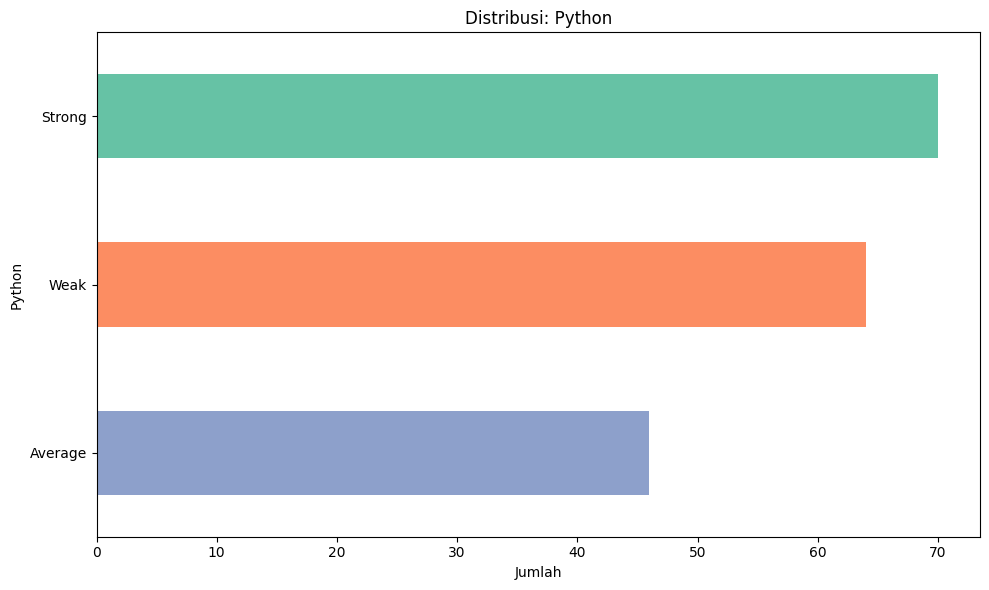

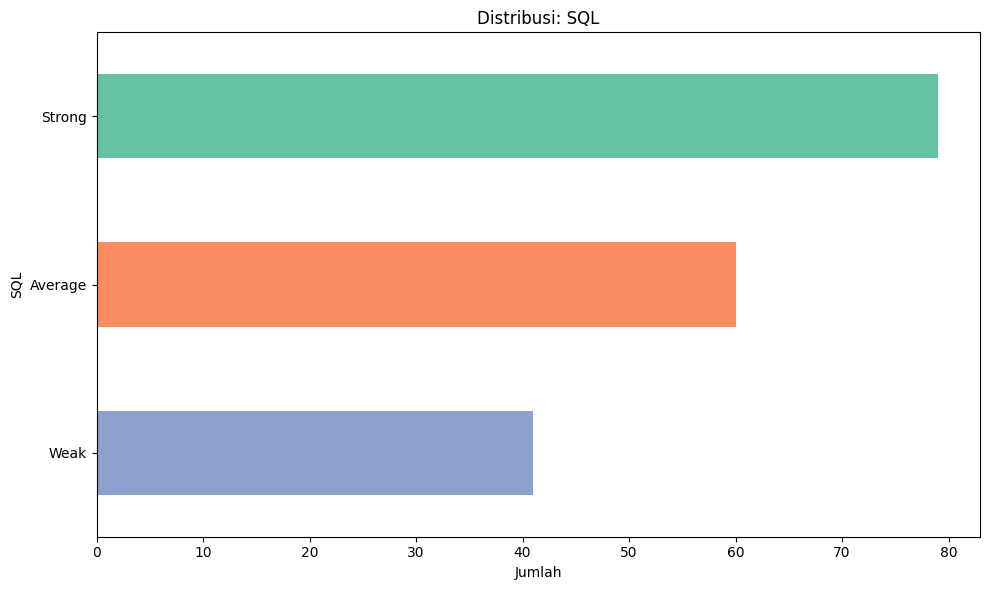

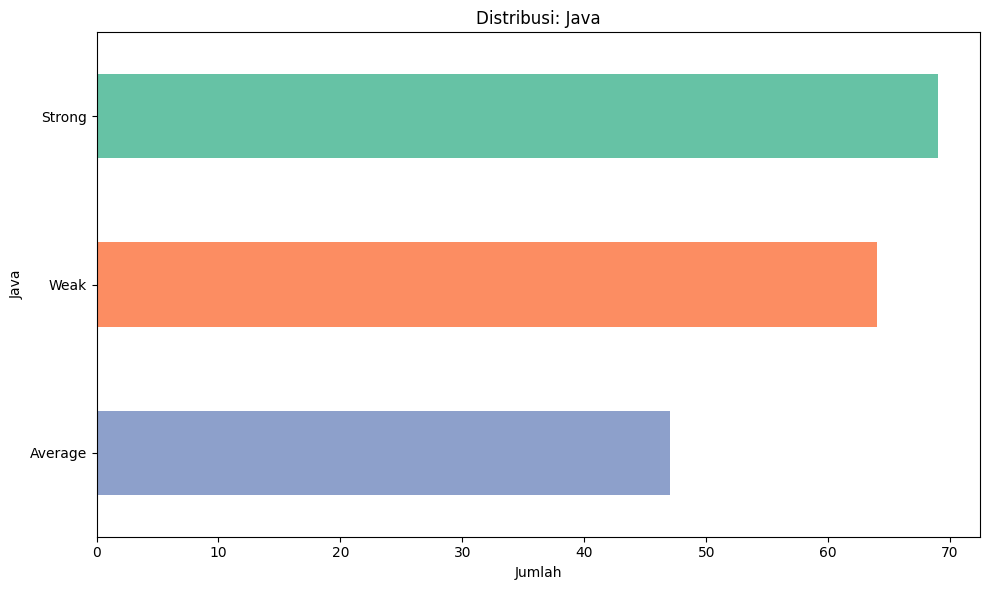

In [12]:
# Distribusi Kolom Kategorika
df['Projects'].value_counts().head(10).plot(kind='barh', figsize=(10,6), color=sns.color_palette('Set2'))
plt.title('Top 10 Projects')
plt.xlabel('Jumlah')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

categorical_features = ['Gender', 'Major', 'Interested Domain', 'Python', 'SQL', 'Java']  # tanpa 'Projects'
for col in categorical_features:
    df[col].value_counts().plot(kind='barh', figsize=(10,6), color=sns.color_palette('Set2'))
    plt.title(f'Distribusi: {col}')
    plt.xlabel('Jumlah')
    plt.ylabel(col)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()



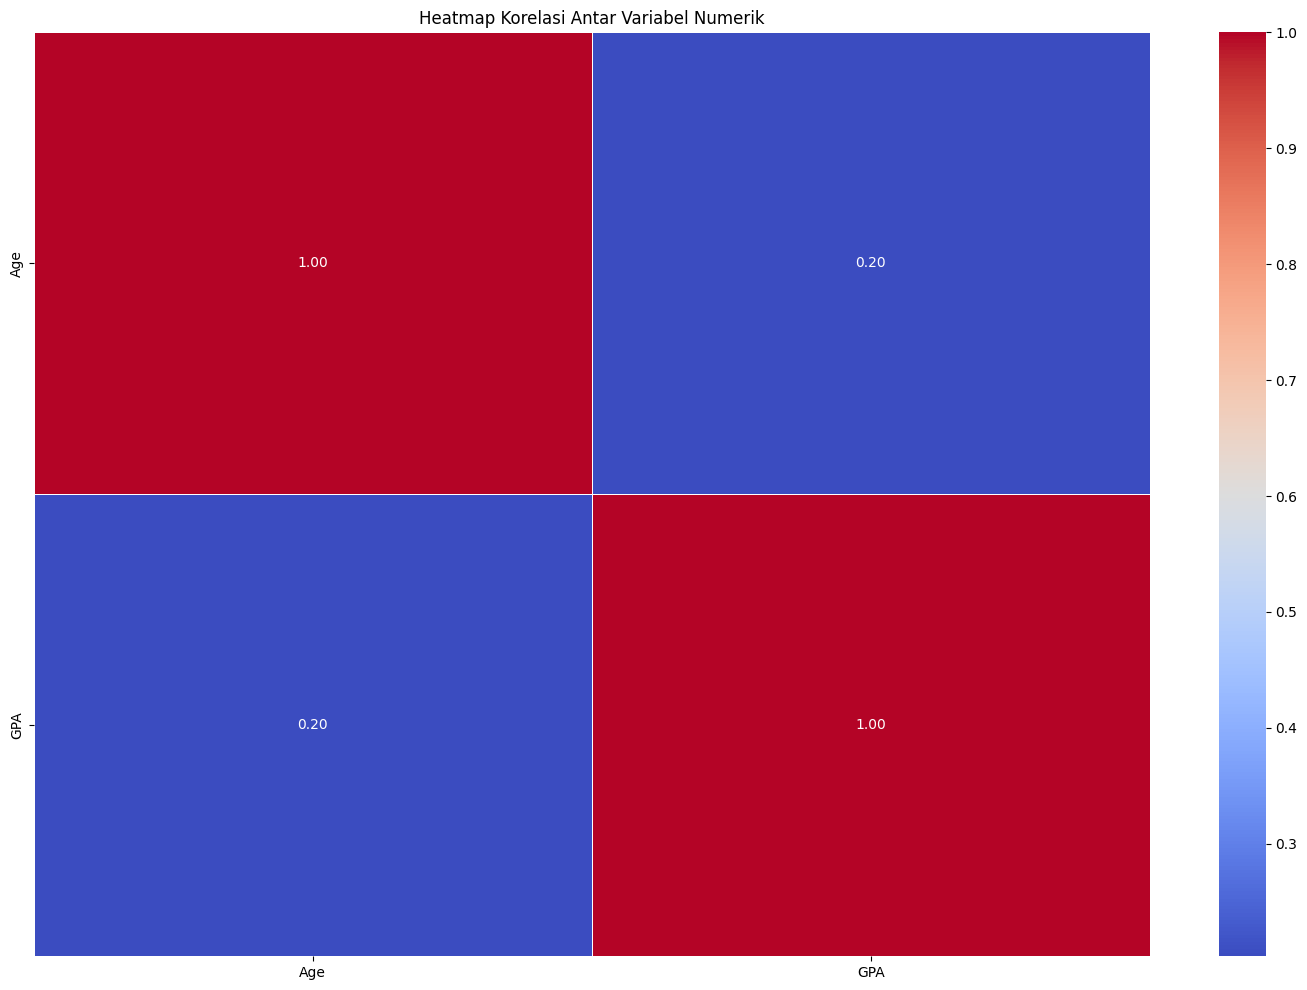

In [13]:
# Korelasi antar Fitur Numerik
correlation = df[numerical_features].corr()
plt.figure(figsize=(18, 12))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()

# Data Preprocessing

In [14]:
# Mengubah Kolom Python-Sql-Java menjadi Datascience, Databae, Programming
skill_cols_current = ['Python', 'SQL', 'Java']
skill_cols_new = ['Datascience', 'Database', 'Programming']
df = df.rename(columns=dict(zip(skill_cols_current, skill_cols_new)))
print(f"   Successfully renamed to standardized format: {skill_cols_new}")

   Successfully renamed to standardized format: ['Datascience', 'Database', 'Programming']


In [15]:
# Drop Unrelevant Feature
features_to_drop = ['Student ID', 'Name']
df = df.drop(columns=features_to_drop)

In [16]:
# Encoding
skill_mapping = {'Weak':0,'Average':1,'Strong':2}
for skill in ['Datascience','Database','Programming']:
    df[f'{skill}_encoded'] = df[skill].map(skill_mapping)

from sklearn.preprocessing import LabelEncoder
df['Gender_encoded'] = LabelEncoder().fit_transform(df['Gender'])
df['Future_Career_encoded'] = LabelEncoder().fit_transform(df['Future Career'])

cat_cols = ['Major','Interested Domain','Projects']
df = pd.get_dummies(df, columns=cat_cols, prefix=cat_cols)


In [17]:
# Drop kolom kategori asli yang masih string/object
cols_to_drop = df.select_dtypes(include='object').columns
df = df.drop(columns=cols_to_drop)

In [18]:
# Fitur dan Target
core_feats = ['Age','GPA','Gender_encoded'] + [f'{skill}_encoded' for skill in ['Datascience','Database','Programming']]
onehot_feats = [c for c in df.columns if any(prefix in c for prefix in cat_cols)]
X = df[core_feats + onehot_feats]
y = df['Future_Career_encoded']

In [19]:
#StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# Split Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def split_and_scale_data(X, y, test_size=0.2, random_state=42):
    """
    Simple data split with stratification and scaling

    Returns:
        X_train_scaled, X_test_scaled, y_train, y_test, scaler
    """
    try:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state, stratify=y
        )
    except ValueError:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state
        )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print(f"Split: train={len(y_train)}, test={len(y_test)} | Features: {X_train.shape[1]} columns")
    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

X_train_scaled, X_test_scaled, y_train, y_test, scaler = split_and_scale_data(X, y)

Split: train=144, test=36 | Features: 99 columns


## Modelling

In [21]:
def run_random_forest(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Random Forest Accuracy: {acc:.4f}")
    return model, acc

def run_gradient_boosting(X_train, X_test, y_train, y_test):
    model = GradientBoostingClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Gradient Boosting Accuracy: {acc:.4f}")
    return model, acc

def run_logistic_regression(X_train, X_test, y_train, y_test):
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Logistic Regression Accuracy: {acc:.4f}")
    return model, acc

def run_svm(X_train, X_test, y_train, y_test):
    model = SVC(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"SVM Accuracy: {acc:.4f}")
    return model, acc

def run_neural_network(X_train, X_test, y_train, y_test):
    model = MLPClassifier(random_state=42, max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Neural Network Accuracy: {acc:.4f}")
    return model, acc

rf_model, rf_acc = run_random_forest(X_train_scaled, X_test_scaled, y_train, y_test)
gb_model, gb_acc = run_gradient_boosting(X_train_scaled, X_test_scaled, y_train, y_test)
lr_model, lr_acc = run_logistic_regression(X_train_scaled, X_test_scaled, y_train, y_test)
svm_model, svm_acc = run_svm(X_train_scaled, X_test_scaled, y_train, y_test)
nn_model, nn_acc = run_neural_network(X_train_scaled, X_test_scaled, y_train, y_test)


Random Forest Accuracy: 0.8889
Gradient Boosting Accuracy: 0.9167
Logistic Regression Accuracy: 0.9167
SVM Accuracy: 0.8611
Neural Network Accuracy: 0.9167


## Hyperparameter Tuning

In [22]:
def get_hyperparameter_grid(model_name):
    if model_name == 'Random Forest':
        param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
        model = RandomForestClassifier(random_state=42, n_jobs=-1)

    elif model_name == 'Gradient Boosting':
        param_grid = {
            'n_estimators': [100, 200],
            'learning_rate': [0.05, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
        model = GradientBoostingClassifier(random_state=42)

    elif model_name == 'Logistic Regression':
        param_grid = {
            'C': [0.1, 1, 10, 100],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear']
        }
        model = LogisticRegression(random_state=42, max_iter=1000)

    elif model_name == 'SVM':
        param_grid = {
            'C': [0.1, 1, 10],
            'kernel': ['rbf', 'linear'],
            'gamma': ['scale', 'auto']
        }
        model = SVC(random_state=42)

    else:
        param_grid = {
            'hidden_layer_sizes': [(50,), (100,), (50, 50)],
            'alpha': [0.0001, 0.001, 0.01],
            'learning_rate': ['constant', 'adaptive']
        }
        model = MLPClassifier(random_state=42, max_iter=1000)

    return param_grid, model


def optimize_hyperparameters(model, param_grid, X_train, y_train, cv_folds=5):
    cv = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=cv,
        scoring='accuracy',
        n_jobs=-1,
        verbose=0,
        return_train_score=True
    )
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_cv_score = grid_search.best_score_

    print(f"\nHyperparameter Optimization Results:")
    print(f"    Best Cross-Validation Score: {best_cv_score:.4f}")
    print(f"    Optimal Parameters:")
    for param, value in best_params.items():
        print(f"     - {param}: {value}")

    return grid_search.best_estimator_, grid_search

## Evaluation

In [32]:
# Evaluate Models
def evaluate_models(models_dict, X_test, y_test):
    scores = {}
    for name, model in models_dict.items():
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

        scores[name] = {
            'Accuracy': round(acc, 4),
            'Precision': round(prec, 4),
            'Recall': round(rec, 4),
            'F1-score': round(f1, 4)
        }


    best_model_name = max(scores, key=lambda k: scores[k]['F1-score'])

    return best_model_name, scores[best_model_name], scores

In [33]:
# Models Result
models = {
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'Logistic Regression': lr_model,
    'SVM': svm_model,
    'Neural Network': nn_model
}

best_name, best_metrics, all_scores = evaluate_models(models, X_test_scaled, y_test)

print("\n=== Model Evaluation Results ===")
for model_name, metrics in all_scores.items():
    print(f"\n--- {model_name} ---")
    for metric_name, score in metrics.items():
        print(f"  {metric_name}: {score}")

print(f"\n===== Best Model =====")
print(f"Best Model: {best_name}")
print(f"Best Model Metrics: {best_metrics}")


=== Model Evaluation Results ===

--- Random Forest ---
  Accuracy: 0.8889
  Precision: 0.8287
  Recall: 0.8889
  F1-score: 0.8513

--- Gradient Boosting ---
  Accuracy: 0.9167
  Precision: 0.8796
  Recall: 0.9167
  F1-score: 0.8917

--- Logistic Regression ---
  Accuracy: 0.9167
  Precision: 0.8657
  Recall: 0.9167
  F1-score: 0.8855

--- SVM ---
  Accuracy: 0.8611
  Precision: 0.7777
  Recall: 0.8611
  F1-score: 0.8136

--- Neural Network ---
  Accuracy: 0.9167
  Precision: 0.8585
  Recall: 0.9167
  F1-score: 0.8824

===== Best Model =====
Best Model: Gradient Boosting
Best Model Metrics: {'Accuracy': 0.9167, 'Precision': 0.8796, 'Recall': 0.9167, 'F1-score': 0.8917}


## Import Model

In [34]:
best_model = models[best_name]
joblib.dump(best_model, 'model.pkl')

['model.pkl']